<a href="https://colab.research.google.com/github/rouzbehshi/Model/blob/main/Input%20Data/Combined_Scenarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy.stats import norm
import pandas as pd
import pytz
from datetime import datetime
import io
import matplotlib.pyplot as plt

In [2]:
!git clone https://github.com/rouzbehshi/Model.git

fatal: destination path 'Model' already exists and is not an empty directory.


In [3]:
%cd Model
%cd Input Data

/content/Model
/content/Model/Input Data


In [4]:
!jupyter nbconvert --to python Climate_Scenario_Generation_rev4.ipynb
!jupyter nbconvert --to python Demand_Scenario_Generation_rev4.ipynb

[NbConvertApp] Converting notebook Climate_Scenario_Generation_rev4.ipynb to python
[NbConvertApp] Writing 17677 bytes to Climate_Scenario_Generation_rev4.py
[NbConvertApp] Converting notebook Demand_Scenario_Generation_rev4.ipynb to python
[NbConvertApp] Writing 7451 bytes to Demand_Scenario_Generation_rev4.py


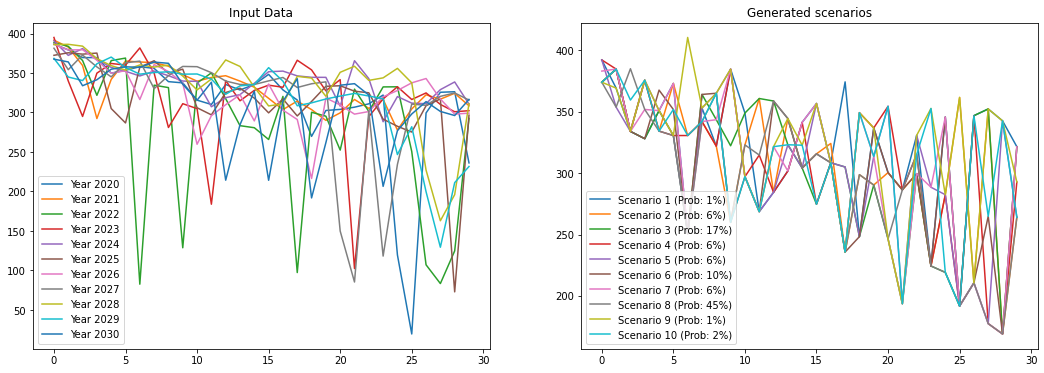

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


        YEAR  MONTH  DAY  HOUR  NET_LOAD
0       2019      1    1     1  2084.471
1       2019      1    1     2  1991.779
2       2019      1    1     3  1930.597
3       2019      1    1     4  1900.568
4       2019      1    1     5  1915.168
...      ...    ...  ...   ...       ...
105115  2030     12   31    20  3279.552
105116  2030     12   31    21  3221.024
105117  2030     12   31    22  3088.264
105118  2030     12   31    23  2863.114
105119  2030     12   31    24  2728.959

[105120 rows x 5 columns]
        YEAR  MONTH  DAY  HOUR  NET_LOAD
0       2019      1    1     1  2059.254
1       2019      1    1     2  1963.970
2       2019      1    1     3  1902.445
3       2019      1    1     4  1873.008
4       2019      1    1     5  1889.043
...      ...    ...  ...   ...       ...
105115  2030     12   31    20  2901.300
105116  2030     12   31    21  2837.925
105117  2030     12   31    22  2718.853
105118  2030     12   31    23  2523.631
105119  2030     12   31    24

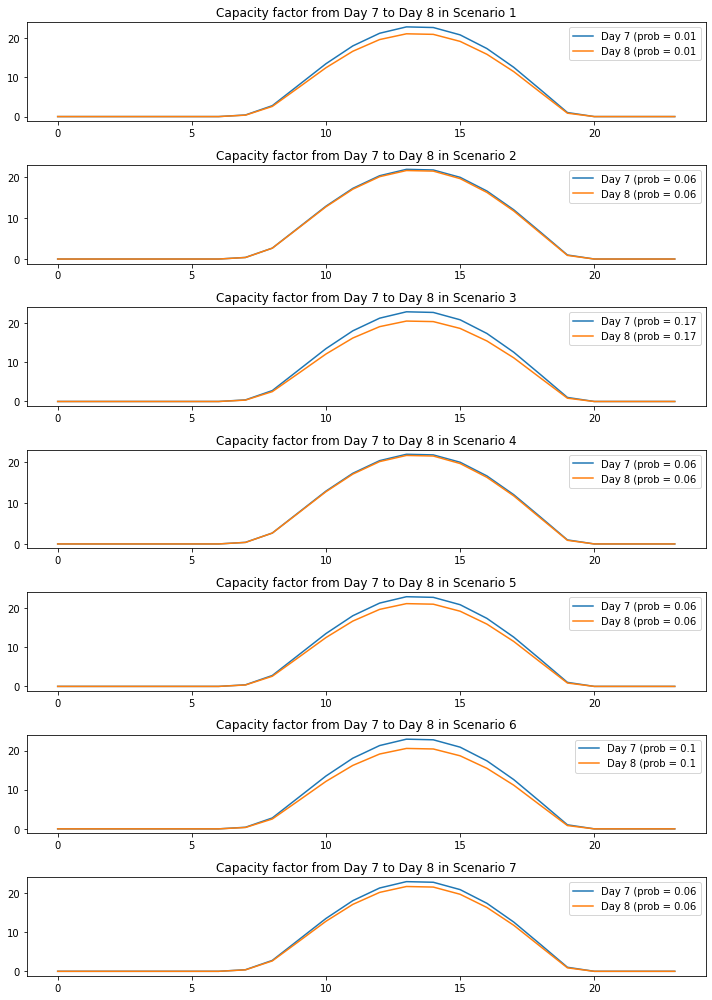

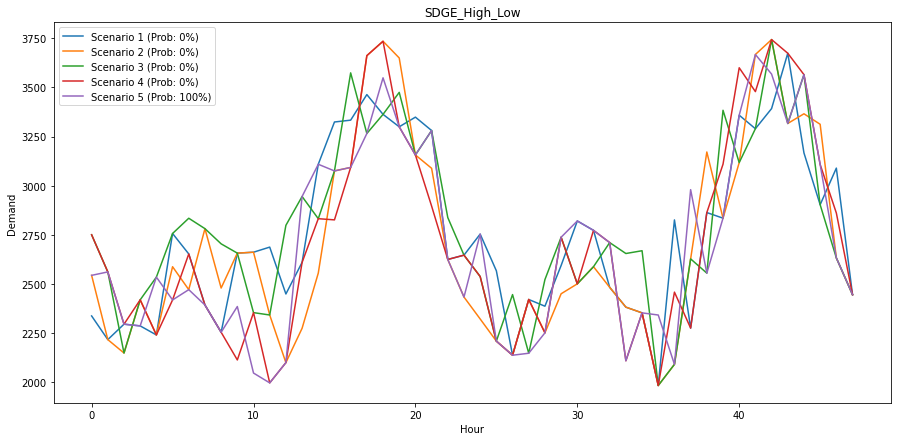

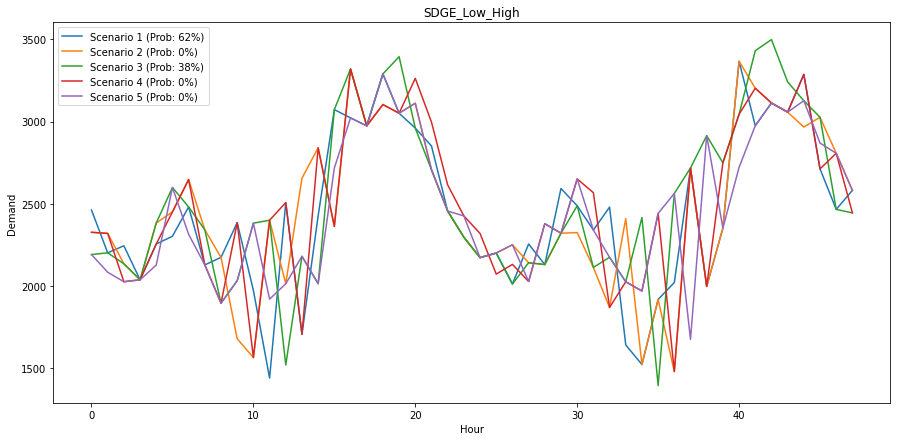

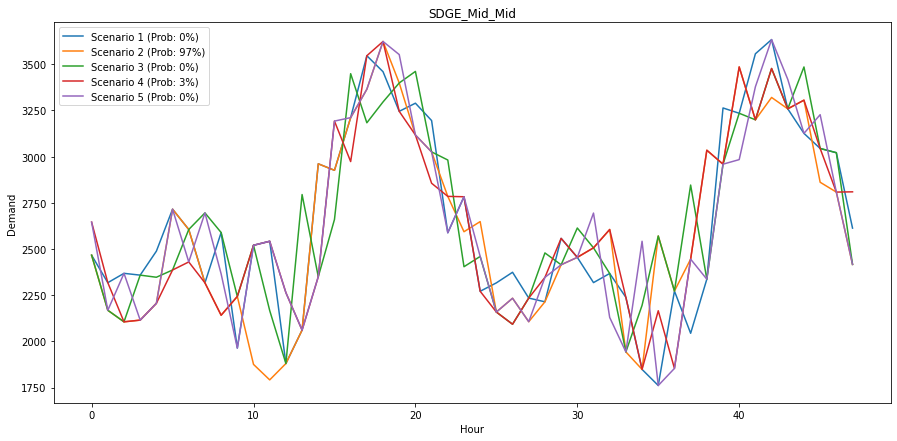

In [5]:
from Climate_Scenario_Generation_rev4 import *
from Demand_Scenario_Generation_rev4 import *

In [18]:

climate_scenarios = CNRM_45_hourly_scenario
demand_scenarios = SDGE_High_Low_scenario
print(pd.DataFrame(CNRM_45_daily_irrad_prob_norm))
print(demand_scenarios)
z=pd.DataFrame(climate_scenarios)
x=pd.DataFrame(demand_scenarios)

          0
0  0.008282
1  0.061194
2  0.166344
3  0.061194
4  0.061194
5  0.100893
6  0.061194
7  0.452169
8  0.005023
9  0.022512
{0: {1: 2337.906365888089, 2: 2544.2319166666666, 3: 2750.557467445244, 4: 2750.557467445244, 5: 2544.2319166666666}, 1: {1: 2217.5850689961317, 2: 2217.5850689961317, 3: 2561.6619310038686, 4: 2561.6619310038686, 5: 2561.6619310038686}, 2: {1: 2295.99125, 2: 2149.3488322255034, 3: 2149.3488322255034, 4: 2295.99125, 5: 2295.99125}, 3: {1: 2287.32975, 2: 2419.7802411903617, 3: 2419.7802411903617, 4: 2419.7802411903617, 5: 2287.32975}, 4: {1: 2241.308139723485, 2: 2241.308139723485, 3: 2535.2713602765148, 4: 2241.308139723485, 5: 2535.2713602765148}, 5: {1: 2756.9925201344004, 2: 2588.0843333333332, 3: 2756.9925201344004, 4: 2419.176146532266, 5: 2419.176146532266}, 6: {1: 2653.01925, 2: 2471.5420515644314, 3: 2834.4964484355683, 4: 2653.01925, 5: 2471.5420515644314}, 7: {1: 2393.4648954381355, 2: 2781.617604561865, 3: 2781.617604561865, 4: 2393.464895438135

In [7]:
def combine_scenarios(pv_capacity, demand):
    pv_capacity_combined = {}
    demand_combined = {}
    for i in range(48):
        pv_capacity_combined[i] = []
        demand_combined[i] = []
        for j in range(1,8):
            for k in range(1,6):
                pv_capacity_combined[i].append(pv_capacity[i][j])
                demand_combined[i].append(demand[i][k])
    return pv_capacity_combined, demand_combined


In [8]:
supply_scenario_SDGE_High_Low_CNRM_45, demand_scenario_SDGE_High_Low_CNRM_45= combine_scenarios(climate_scenarios, demand_scenarios)

demand_probability = SDGE_High_Low_prob_norm
pv_probability = CNRM_45_daily_irrad_prob_norm


In [16]:
print(pd.DataFrame(demand_scenarios))

            0            1            2            3           4   \
1  2337.906366  2217.585069  2295.991250  2287.329750  2241.30814   
2  2544.231917  2217.585069  2149.348832  2419.780241  2241.30814   
3  2750.557467  2561.661931  2149.348832  2419.780241  2535.27136   
4  2750.557467  2561.661931  2295.991250  2419.780241  2241.30814   
5  2544.231917  2561.661931  2295.991250  2287.329750  2535.27136   

            5            6            7            8            9   ...  \
1  2756.992520  2653.019250  2393.464895  2255.014432  2657.227025  ...   
2  2588.084333  2471.542052  2781.617605  2479.697583  2657.227025  ...   
3  2756.992520  2834.496448  2781.617605  2704.380735  2657.227025  ...   
4  2419.176147  2653.019250  2393.464895  2255.014432  2114.203475  ...   
5  2419.176147  2471.542052  2393.464895  2255.014432  2385.715250  ...   

            38           39           40           41           42  \
1  2863.450583  2834.884409  3358.360750  3289.586784  3391.9184

In [10]:
def combined_probability(demand_probability,pv_probability):
  combined_probs = []
  for demand_prob in demand_probability:
    for pv_capacity_probability in pv_probability:
      combined_probs.append(round(demand_prob*pv_capacity_probability,5))
  return combined_probs

In [11]:
a = combined_probability(demand_probability,pv_probability)  
a=pd.DataFrame(a)
print(len(a))

50
